<a href="https://colab.research.google.com/github/Jackyscy/cv/blob/main/C1Spread1_Prophet_Outlier_removal_maually_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install prophet

In [25]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

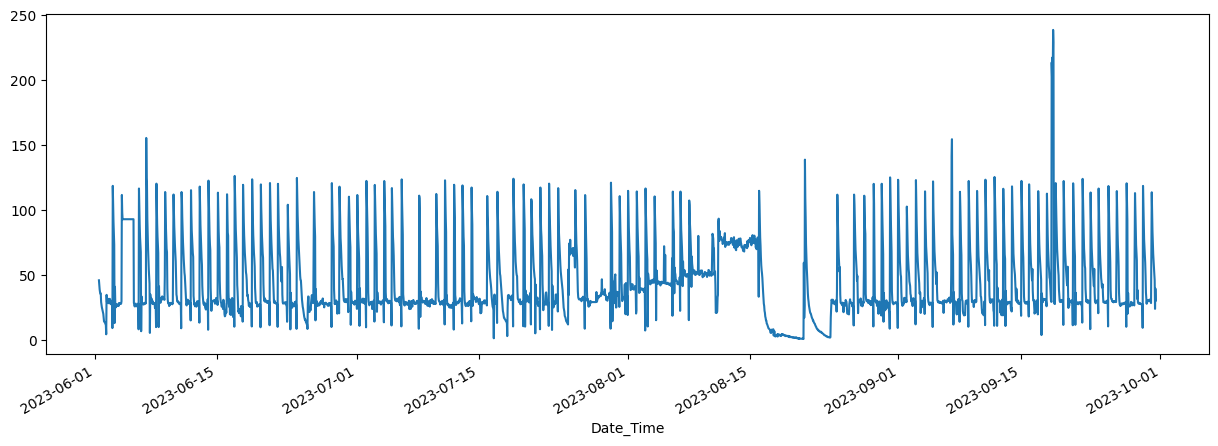

In [26]:
df = pd.read_csv('C1 Spread 1 from 06 to 09_outlier_removalV2.csv', index_col='Date_Time', parse_dates=True)
df["Combust Monitor Actual Spread 1"].plot(figsize=(15, 5));

In [27]:
df_p = df[df['GT Gross MW'] > 190][['Combust Monitor Actual Spread 1']].copy()
df_p['Date_Time'] = df_p.index

In [28]:
df_p.head()

,Combust Monitor Actual Spread 1,Date_Time
Date_Time,,
2023-06-02 11:10:00,29.635532,2023-06-02 11:10:00
2023-06-02 12:10:00,30.289629,2023-06-02 12:10:00
2023-06-02 13:10:00,28.462751,2023-06-02 13:10:00
2023-06-02 14:10:00,31.812954,2023-06-02 14:10:00
2023-06-02 15:10:00,29.296486,2023-06-02 15:10:00


In [29]:
df_p.columns = ['y', 'ds']
df_p.head()

,y,ds
Date_Time,,
2023-06-02 11:10:00,29.635532,2023-06-02 11:10:00
2023-06-02 12:10:00,30.289629,2023-06-02 12:10:00
2023-06-02 13:10:00,28.462751,2023-06-02 13:10:00
2023-06-02 14:10:00,31.812954,2023-06-02 14:10:00
2023-06-02 15:10:00,29.296486,2023-06-02 15:10:00


In [30]:
logdf = df_p.copy()
logdf['y'] = np.log(logdf['y'])
logdf.head()

,y,ds
Date_Time,,
2023-06-02 11:10:00,3.388974,2023-06-02 11:10:00
2023-06-02 12:10:00,3.410805,2023-06-02 12:10:00
2023-06-02 13:10:00,3.348596,2023-06-02 13:10:00
2023-06-02 14:10:00,3.459874,2023-06-02 14:10:00
2023-06-02 15:10:00,3.377468,2023-06-02 15:10:00


In [31]:
split_date = '2023-09-15'
train = logdf.loc[logdf.index <= split_date].copy()
test = logdf.loc[logdf.index > split_date].copy()

In [32]:
m3 = Prophet()

In [33]:
m3.fit(logdf)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp5sleeun/4ky3vss5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp5sleeun/59k7vzs4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52760', 'data', 'file=/tmp/tmpp5sleeun/4ky3vss5.json', 'init=/tmp/tmpp5sleeun/59k7vzs4.json', 'output', 'file=/tmp/tmpp5sleeun/prophet_model59yq4vnc/prophet_model-20231026124235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:42:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [34]:
future = m3.make_future_dataframe(periods=300, freq = 'H')

In [35]:
forecast = m3.predict(future)

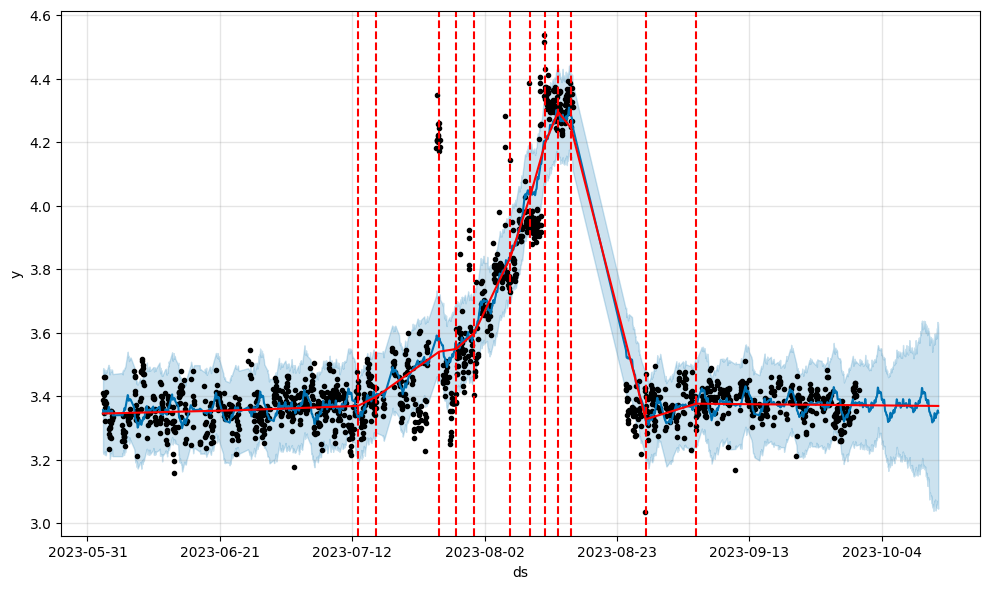

In [36]:
fig = m3.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m3, forecast)

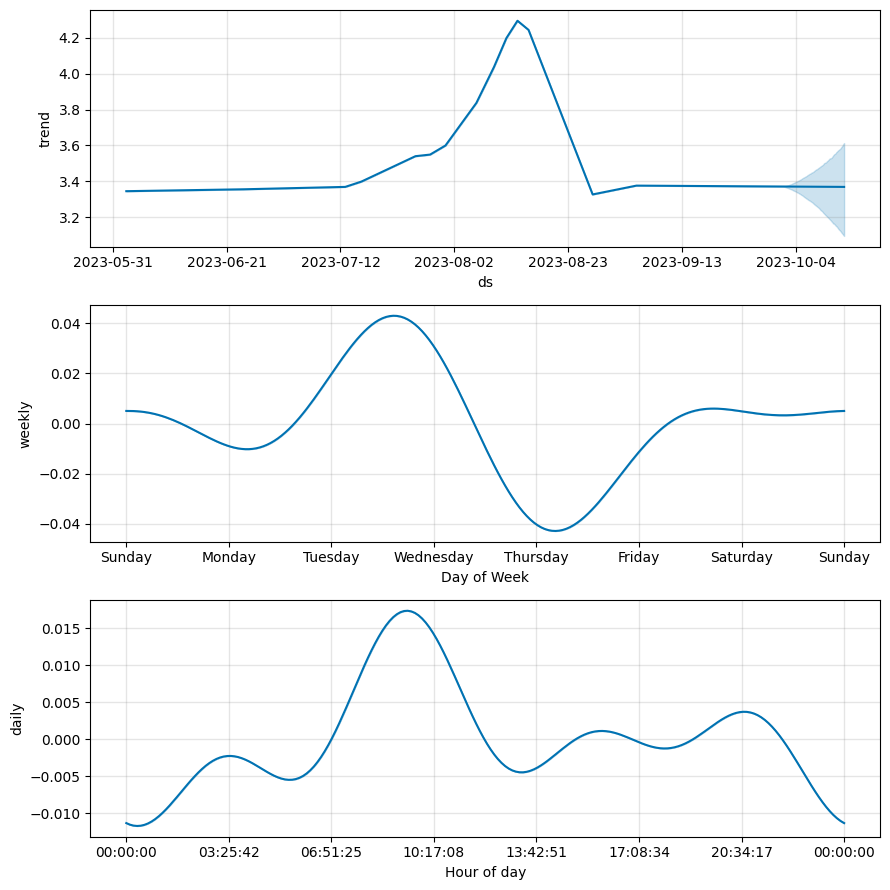

In [37]:
m3.plot_components(forecast);

In [38]:
from prophet.diagnostics import cross_validation

In [50]:
df_cv = cross_validation(
    m3,
    initial='300 hours',
    period='12 hours',
    horizon='24 hours')

INFO:prophet:Making 196 forecasts with cutoffs between 2023-06-14 23:10:14 and 2023-09-29 11:10:14


  0%|          | 0/196 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpp5sleeun/cn1v7g41.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp5sleeun/2x1dm281.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92131', 'data', 'file=/tmp/tmpp5sleeun/cn1v7g41.json', 'init=/tmp/tmpp5sleeun/2x1dm281.json', 'output', 'file=/tmp/tmpp5sleeun/prophet_modelyqu7s65n/prophet_model-20231026125236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:52:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:52:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp5sleeun/v4u6inb6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp5sleeun/x_1t2k9l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [51]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-06-15 00:10:14,3.411227,3.349018,3.476353,3.414173,2023-06-14 23:10:14
1,2023-06-15 09:10:14,3.455650,3.385660,3.522373,3.449993,2023-06-14 23:10:14
2,2023-06-15 10:10:14,3.454489,3.389250,3.518172,3.375511,2023-06-14 23:10:14
3,2023-06-15 11:10:14,3.459496,3.389982,3.530146,3.359895,2023-06-14 23:10:14
4,2023-06-15 12:10:14,3.464346,3.394832,3.527716,3.253381,2023-06-14 23:10:14
...,...,...,...,...,...,...
2742,2023-09-29 19:10:14,3.375915,3.246269,3.508576,3.441927,2023-09-29 11:10:14
2743,2023-09-29 20:10:14,3.378780,3.243909,3.510915,3.403266,2023-09-29 11:10:14
2744,2023-09-29 21:10:14,3.378651,3.251692,3.507985,3.399130,2023-09-29 11:10:14
2745,2023-09-29 22:10:14,3.373714,3.243291,3.509891,3.352721,2023-09-29 11:10:14


In [52]:
from prophet.diagnostics import performance_metrics

In [53]:
pm = performance_metrics(df_cv)
pm

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 03:00:00,0.049836,0.223239,0.130161,0.037232,0.020902,0.036666,0.663784
1,0 days 03:59:46,0.046042,0.214573,0.128536,0.036606,0.020902,0.036311,0.665633
2,0 days 04:00:00,0.052665,0.229488,0.133743,0.038188,0.019779,0.037620,0.667153
3,0 days 04:59:46,0.050379,0.224452,0.132845,0.037666,0.019331,0.037367,0.667028
4,0 days 05:00:00,0.052218,0.228512,0.131580,0.037302,0.019553,0.036925,0.688738
5,0 days 05:59:46,0.050921,0.225658,0.131239,0.037122,0.017642,0.036899,0.682117
6,0 days 06:00:00,0.050530,0.224789,0.128906,0.036450,0.017325,0.036275,0.684854
7,0 days 06:59:46,0.051052,0.225947,0.132287,0.037347,0.018436,0.037261,0.659150
8,0 days 07:00:00,0.052686,0.229535,0.133849,0.037946,0.019679,0.037732,0.647662
9,0 days 07:59:46,0.052140,0.228341,0.137687,0.039059,0.020019,0.039000,0.619019


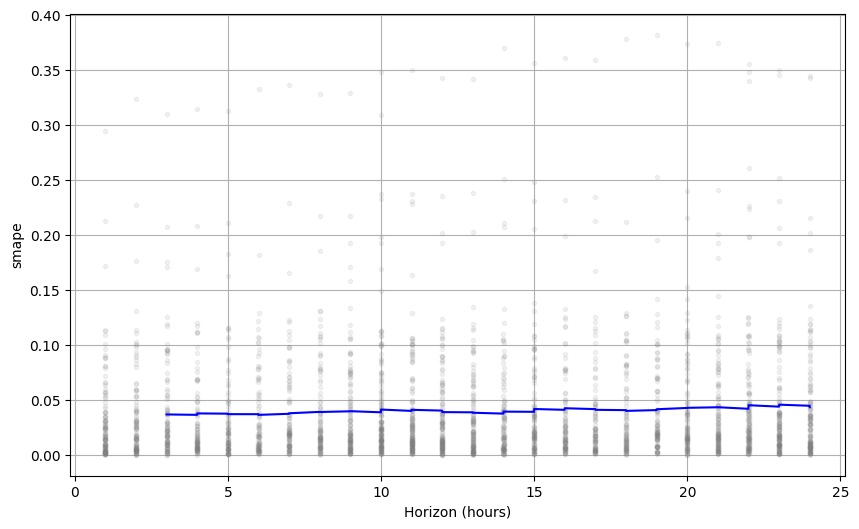

In [54]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='smape');

In [55]:
pm['smape'].mean()

0.04018163671467445

In [45]:
forecast['fact'] = logdf['y'].reset_index(drop = True)

In [47]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [56]:
df_cv.head(30)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-06-15 00:10:14,3.411227,3.349018,3.476353,3.414173,2023-06-14 23:10:14
1,2023-06-15 09:10:14,3.455650,3.385660,3.522373,3.449993,2023-06-14 23:10:14
2,2023-06-15 10:10:14,3.454489,3.389250,3.518172,3.375511,2023-06-14 23:10:14
3,2023-06-15 11:10:14,3.459496,3.389982,3.530146,3.359895,2023-06-14 23:10:14
4,2023-06-15 12:10:14,3.464346,3.394832,3.527716,3.253381,2023-06-14 23:10:14
5,2023-06-15 13:10:14,3.465920,3.400262,3.527890,3.266728,2023-06-14 23:10:14
6,2023-06-15 14:10:14,3.465426,3.398625,3.536565,3.316017,2023-06-14 23:10:14
7,2023-06-15 18:10:14,3.464300,3.396992,3.534230,3.322618,2023-06-14 23:10:14
8,2023-06-15 19:10:14,3.464687,3.398404,3.530284,3.346187,2023-06-14 23:10:14
9,2023-06-15 12:10:14,3.443313,3.380136,3.509410,3.253381,2023-06-15 11:10:14
